# IMEX-RB: A Fast and Stable Time Integration Method

This notebook introduces and tests a novel time‐integration scheme, namely IMEX-RB. 
In the following, a linear system of ODEs stemming from a PDE space discretization is defined.
Then, the performance of IMEX-RB is compared with that of backward and forward Euler (BE and FE).

### Let us import the necessary time integration schemes

In [1]:
import numpy as np
from euler import backward_euler, forward_euler
from imexrb import imexrb
import mpl_pubstyle

## Solve a 1D Heat equation

In [2]:
from problems1D import Heat1D

L = 1
Nx = 500
kappa = 0.5
bc_left = 0.0
bc_right = 0.0
t0 = 0.0
tf = 1.0
tspan = [t0, tf]
# Define the problem object
problem = Heat1D(Nx, L, kappa, bc_left, bc_right)
u0 = problem.initial_condition()


We now integrate over time, using different schemes. First of all, we define some parameters for the time integration

In [3]:
# Define number of timesteps
Nt = 200
# Define epsilon for absolute stability condition
epsilon = 1e-3 # 1.0/np.linalg.cond(problem.A)
# Define max dimension of subspace before subiterations
maxsize = int(np.ceil(np.pow(Nx, 1/3)))
# Define max allowed enlargement during subiterations
maxsubiter = maxsize

In [4]:
maxsize

8

In [5]:
# First, IMEX-RB
uIMEX, tvec, subiter = imexrb(problem, u0, tspan, Nt, epsilon, maxsize, maxsubiter)

In [6]:
uBE, _ = backward_euler(problem, u0, tspan, Nt)
uFE, _ = forward_euler(problem, u0, tspan, Nt)

### Compute and plot errors

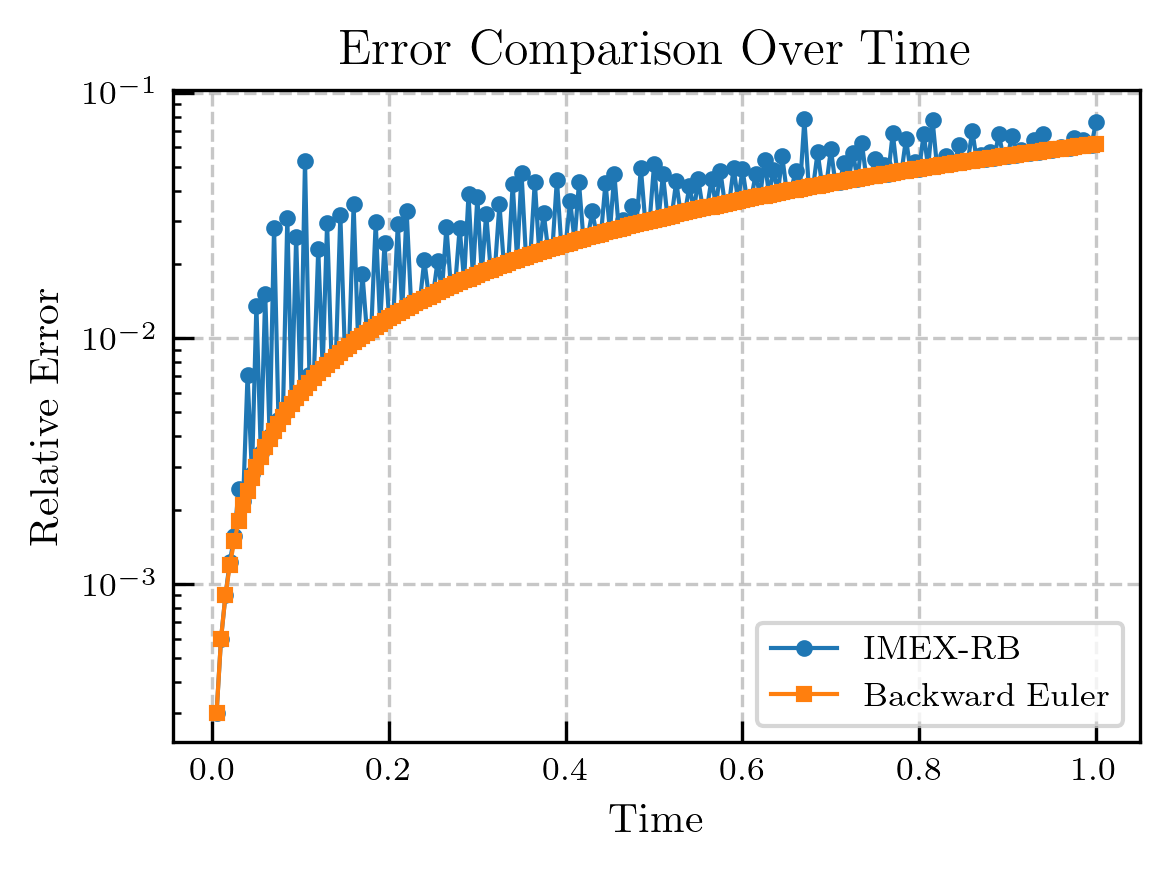

In [7]:
from utils import compute_errors
import matplotlib.pyplot as plt

# Compute relative errors over time 
errIMEX = compute_errors(uIMEX, tvec, problem.domain, problem.exact_sol)
errBE = compute_errors(uBE, tvec, problem.domain, problem.exact_sol)
# errFE = compute_errors(uFE, tvec, problem.domain, problem.exact_sol)

# Plot the errors
plt.semilogy(tvec[1:], errIMEX, label="IMEX-RB", marker='o')
plt.semilogy(tvec[1:], errBE, label="Backward Euler", marker='s')
# plt.semilogy(tvec[1:], errFE, label="Forward Euler", marker='^')

# Add labels, legend, and title
plt.xlabel("Time")
plt.ylabel("Relative Error")
plt.title("Error Comparison Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Plot the animation of the solution
Note that an animated plot in jupyter is not straightforward, and that is why there are some weird commands

In [8]:
# %matplotlib ipympl
# from IPython import display
# import time

# fig, ax = plt.subplots(1, 1)
# hdisplay = display.display("", display_id=True)

# # Set axis labels and limits
# ax.set_ylim(0, 1)
# ax.set_xlim(problem.domain[0], problem.domain[-1])
# ax.set_xlabel("Position (x)")
# ax.set_ylabel("Solution")

# # Initialize the line obj
# line_imex, = ax.plot([], [], "black", label="IMEX-RB")
# line_be, = ax.plot([], [], "red", linestyle="--", label="Backward Euler")
# ax.legend()

# for n, t in enumerate(tvec):
#     line_imex.set_data(problem.domain, uIMEX[:, n])  
#     line_be.set_data(problem.domain, uBE[:, n])      
#     hdisplay.update(fig)
#     # time.sleep(0.001)

# plt.close(fig)


In [9]:
%matplotlib inline

## Convergence test
We run a convergence test by computing the error at final time for different choices of $N_t$

In [ ]:
# We now run a convergence test and plot the results
# Define the range of Nt values
Nt_values = [2**n for n in range(2, 10)]
errors_imex = []
errors_be = []
errors_fe = []

# Loop over Nt values
for Nt in Nt_values:
    # Time discretization
    tvec = np.linspace(t0, tf, Nt + 1)
    dt = tvec[1] - tvec[0]

    # Solve the problem with each scheme
    uIMEX, *_ = imexrb(problem, u0, tspan, Nt, epsilon, maxsize, maxsubiter)
    uBE, _ = backward_euler(problem, u0, tspan, Nt)
    uFE, _ = forward_euler(problem, u0, tspan, Nt)

    # Compute errors at final time for each scheme
    err_imex = compute_errors(uIMEX, tvec, problem.domain, problem.exact_sol)
    err_be = compute_errors(uBE, tvec, problem.domain, problem.exact_sol)
    err_fe = compute_errors(uFE, tvec, problem.domain, problem.exact_sol)

    # Store the final error
    errors_imex.append(err_imex[-1])
    errors_be.append(err_be[-1])
    errors_fe.append(err_fe[-1])



ValueError: too many values to unpack (expected 2)

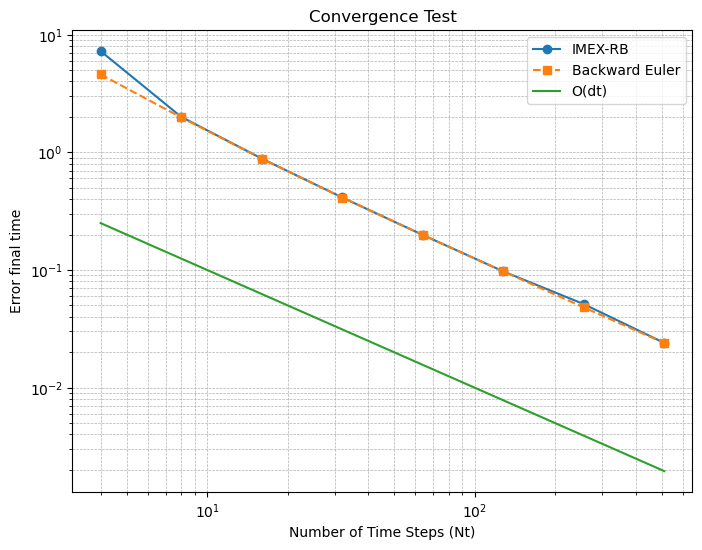

In [ ]:
# Plot the convergence results
plt.figure(figsize=(8, 6))
plt.loglog(Nt_values, errors_imex, label="IMEX-RB", marker='o', linestyle='-')
plt.loglog(Nt_values, errors_be, label="Backward Euler", marker='s', linestyle='--')
# plt.loglog(Nt_values, errors_fe, label="Forward Euler", marker='^', linestyle='-.')
plt.loglog(Nt_values, [1/Nt for Nt in Nt_values], label="O(dt)")
plt.xlabel("Number of Time Steps (Nt)")
plt.ylabel("Error final time")
plt.title("Convergence Test")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [ ]:
errors_be  

[np.float64(4.58548293848917),
 np.float64(1.977167742364879),
 np.float64(0.8844330423119228),
 np.float64(0.4125958558472491),
 np.float64(0.19843949663442442),
 np.float64(0.09720431003072703),
 np.float64(0.04809737259477699),
 np.float64(0.023927731276562152)]